# Unsupervised Learning
The target variable isn't given. We will look at two types of problems:
- Dimension Reduction
- Clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo 

In [5]:
# fetch dataset 
travel_review_ratings = fetch_ucirepo(id=485) 
  
# data (as pandas dataframes) 
X = travel_review_ratings.data.features 
y = travel_review_ratings.data.targets 

#concatenating X and y to create a single dataframe
data = pd.concat([X, y], axis=1)
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [6]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoos                   5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null  

In [7]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
          churches      resorts      beaches        parks     theatres  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.455720     2.319707     2.489331     2.796886     2.958941   
std       0.827604     1.421438     1.247815     1.309159     1.339056   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.905000     2.060000     2.460000     2.670000   
75%       1.810000     2.682500     2.740000     4.092500     4.312500   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

          museums        malls         zoos  restaurants    pubs/bars  ...  \
count  5456.00000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.89349     3.351395     2.540795     3.126019     2.832729  ...   
std       1.28240     1.413492     1.111391     1.356802     1.307665  ...

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64


In [10]:
#fill missing values with 0
data.fillna(0, inplace=True)

In [12]:
# Convert columns to numeric (if necessary), coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

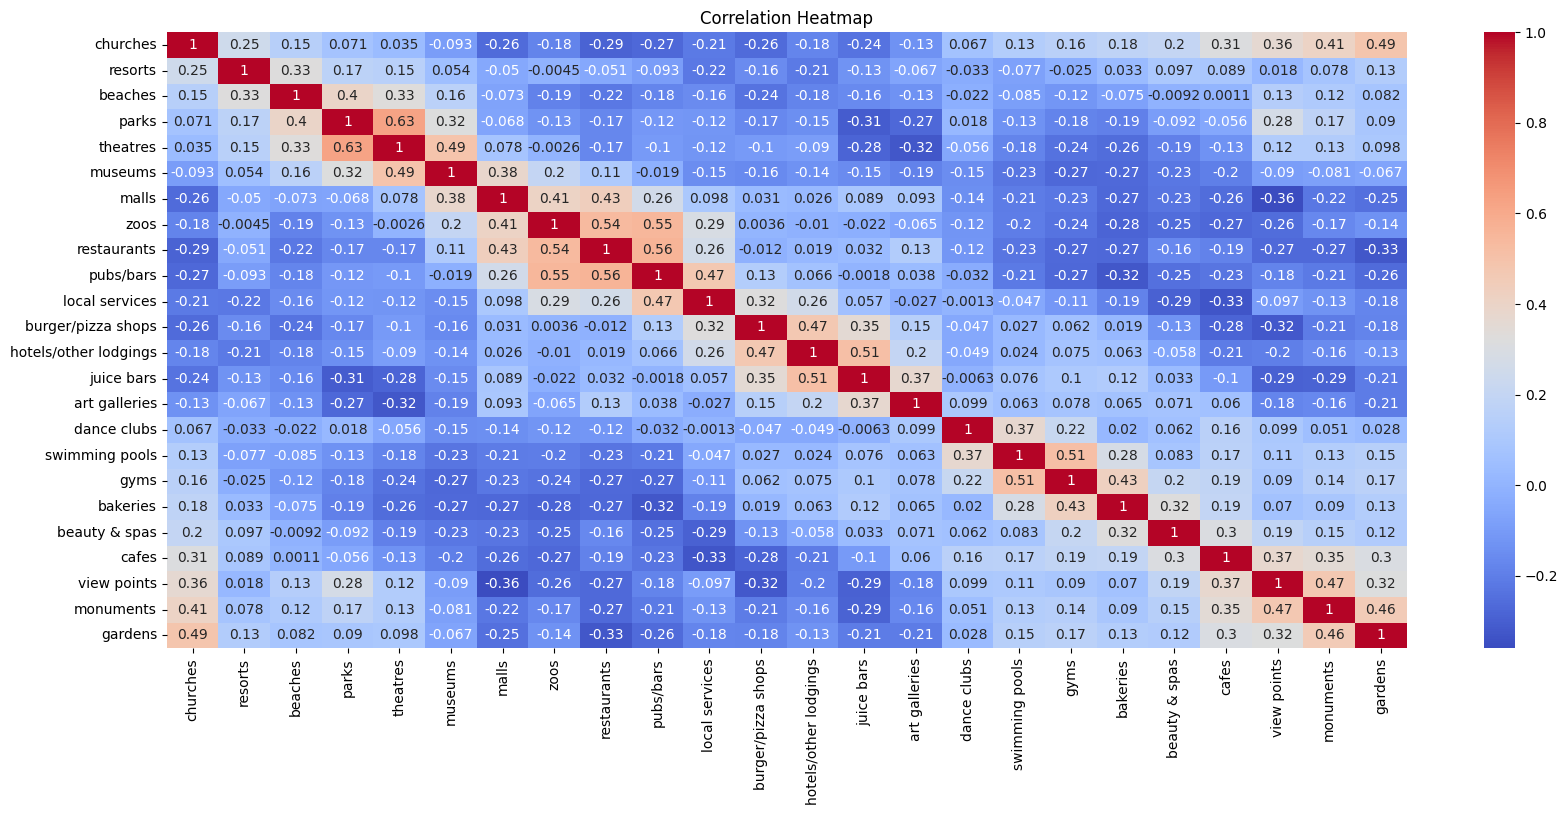

In [14]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#check nan values for data
print("Number of NaN values in the dataset: ", data.isnull().sum().sum())

# Drop rows with NaN values
data = data.dropna()

#check nan values for data
print("Number of NaN values in the dataset: ", data.isnull().sum().sum())

Number of NaN values in the dataset:  1
Number of NaN values in the dataset:  0


I dont see any highly correlated features (check for multicollinearity)

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means Clustering
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

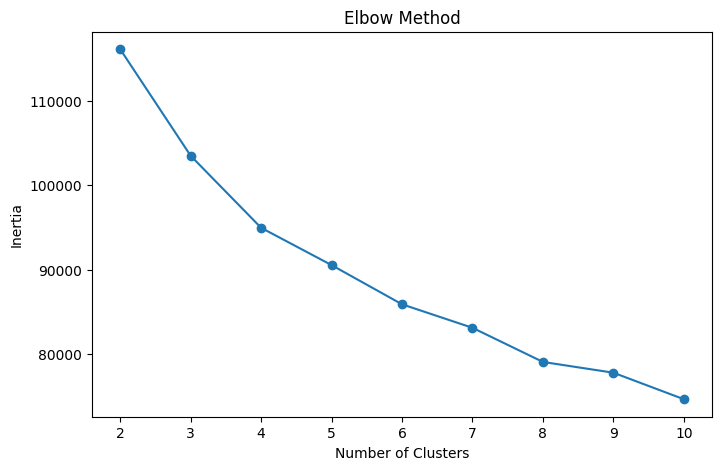

In [34]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

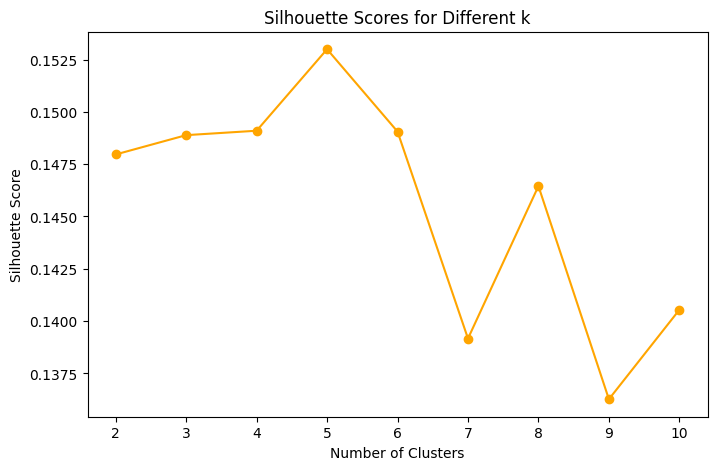

In [35]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

In [36]:
# Final Model (choose k based on Elbow/Silhouette)
optimal_k = 5  # Replace with the chosen k from analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

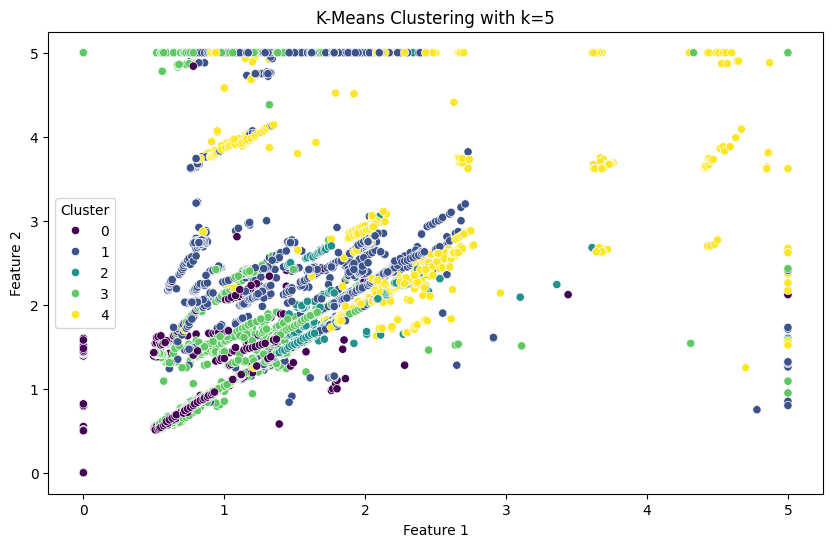

In [37]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette="viridis")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

In [28]:
# Evaluate Final Model
print(f"Silhouette Score for k={optimal_k}: {silhouette_score(scaled_data, data['Cluster'])}")

Silhouette Score for k=10: 0.13964616073345085


Since we dont see clear cluster, lets use PCA to reduce the dimension and then do k means

In [39]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

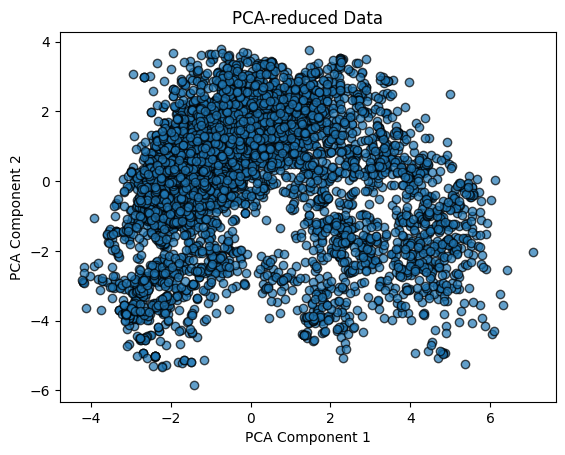

In [40]:
# Visualize PCA-reduced data
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-reduced Data')
plt.show()

In [41]:
# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Testing clusters from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

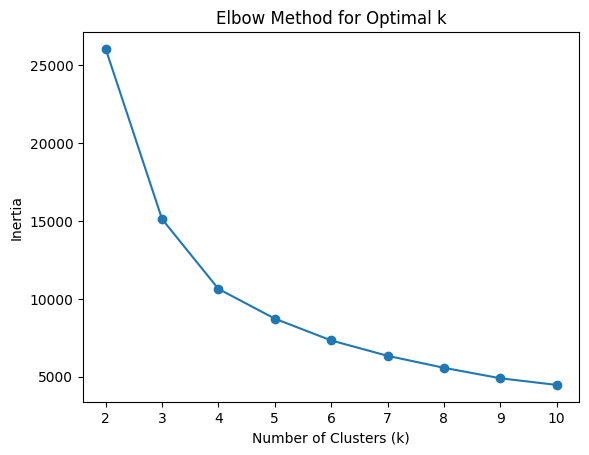

In [42]:
# Plot Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

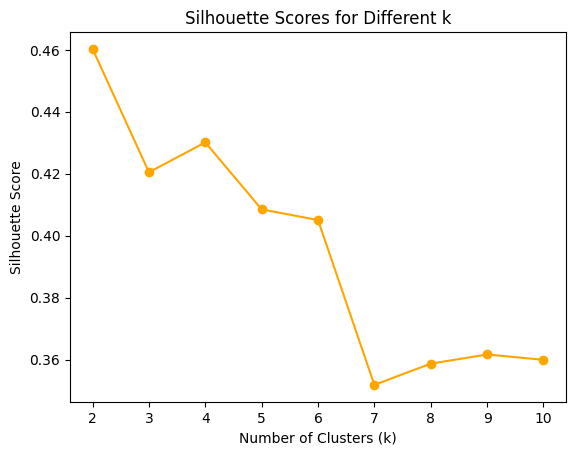

In [43]:
# Plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

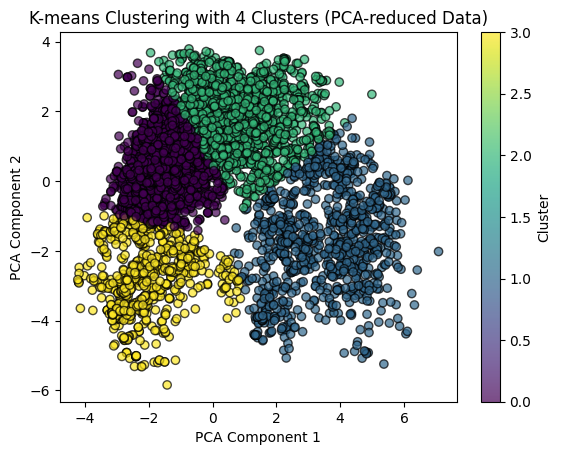

In [45]:
optimal_k = 4  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clustered PCA-reduced data
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_26378/202044702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set3')


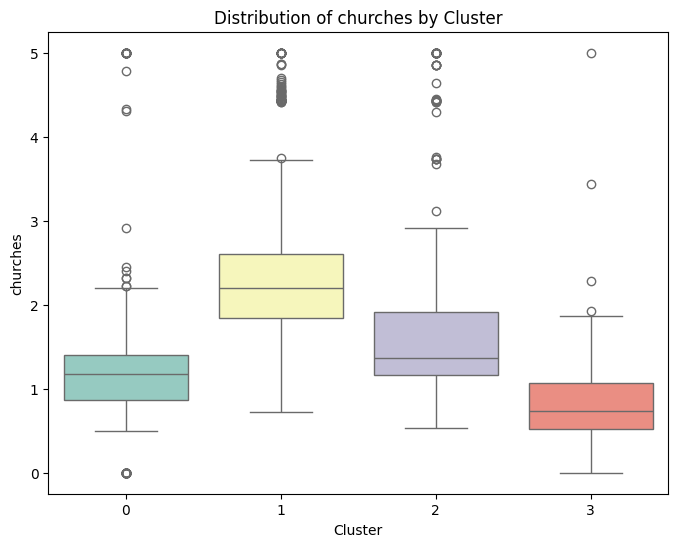

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_26378/202044702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set3')


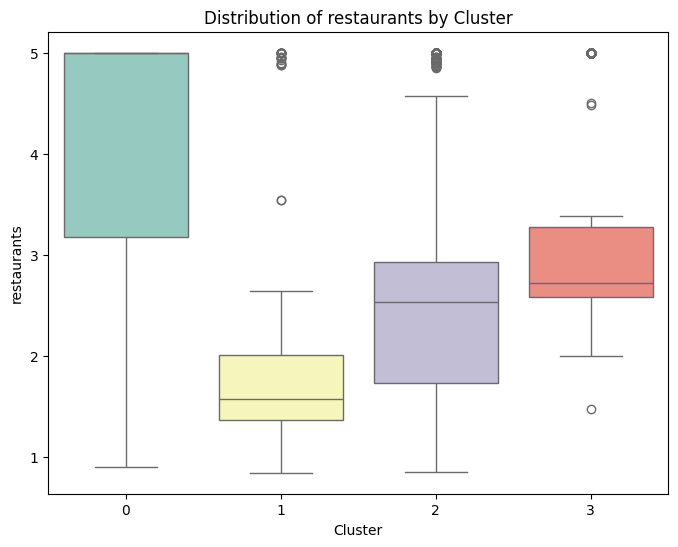

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_26378/202044702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set3')


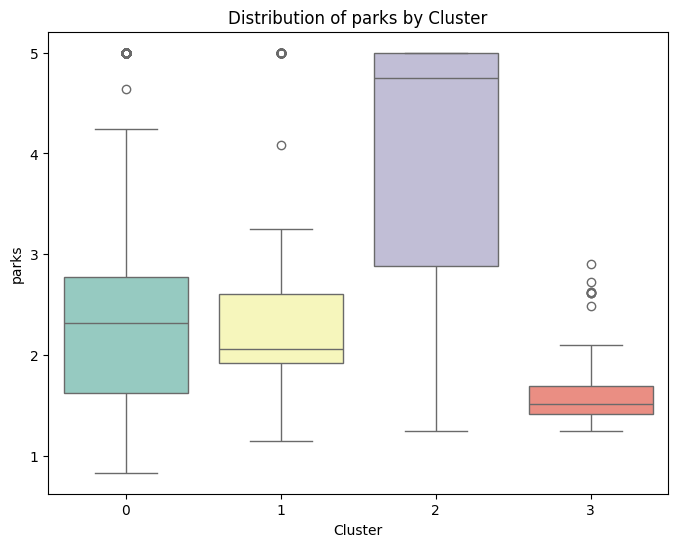

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_26378/202044702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set3')


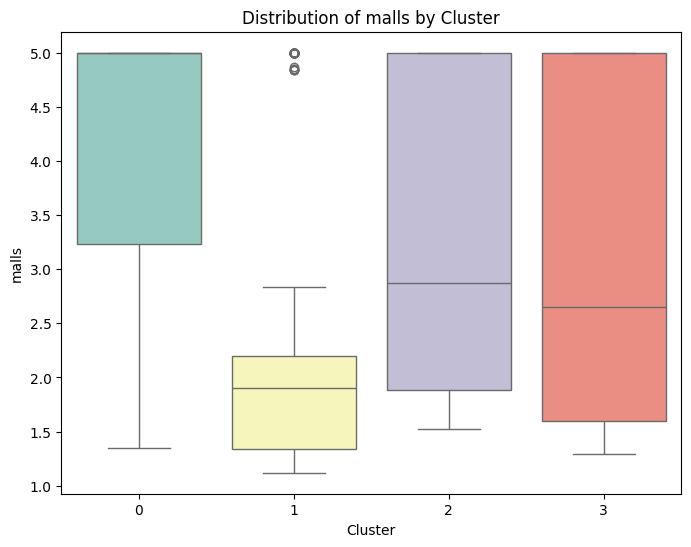

In [46]:
features_to_plot = ['churches', 'restaurants', 'parks', 'malls']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data, palette='Set3')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()